# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({
'figure.figsize': (6, 6),
'figure.dpi': 300,
'axes.spines.top': False,
'axes.spines.right': False,
'axes.linewidth': 1.0,
'axes.prop_cycle': plt.cycler(color='kbrgymc'),
'font.family': 'Helvetica Neue',
'font.size': 12,
'legend.frameon': 'false',
'xtick.labelsize': 14,
'ytick.labelsize': 14,
})

/Users/ryanhigginbotham/anaconda3/envs/dataAnalysis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Equations

In [3]:
def sigmoid(x, a, b, c, d):
    """
    this is used to estimate the indifference points
    """
    return a / (1 + np.exp(-(b * (x - c)))) + d


def cubic(x, a, b, c, d):
    """
    this is used for the cubic trend test (McDowell et al., 2016) to evaluate residuals
    """
    return a * x**3 + b * x**2 + c * x + d


# discounting models
# note: A must be defined before using these functions
def mazur(x, k):
    return A / (1 + k * x)


def rachlin(x, k, s):
    return A / (1 + k * x**s)


def myerson_green(x, k, s):
    return A / (1 + k * x) ** s

# Individual AO Estimaiton

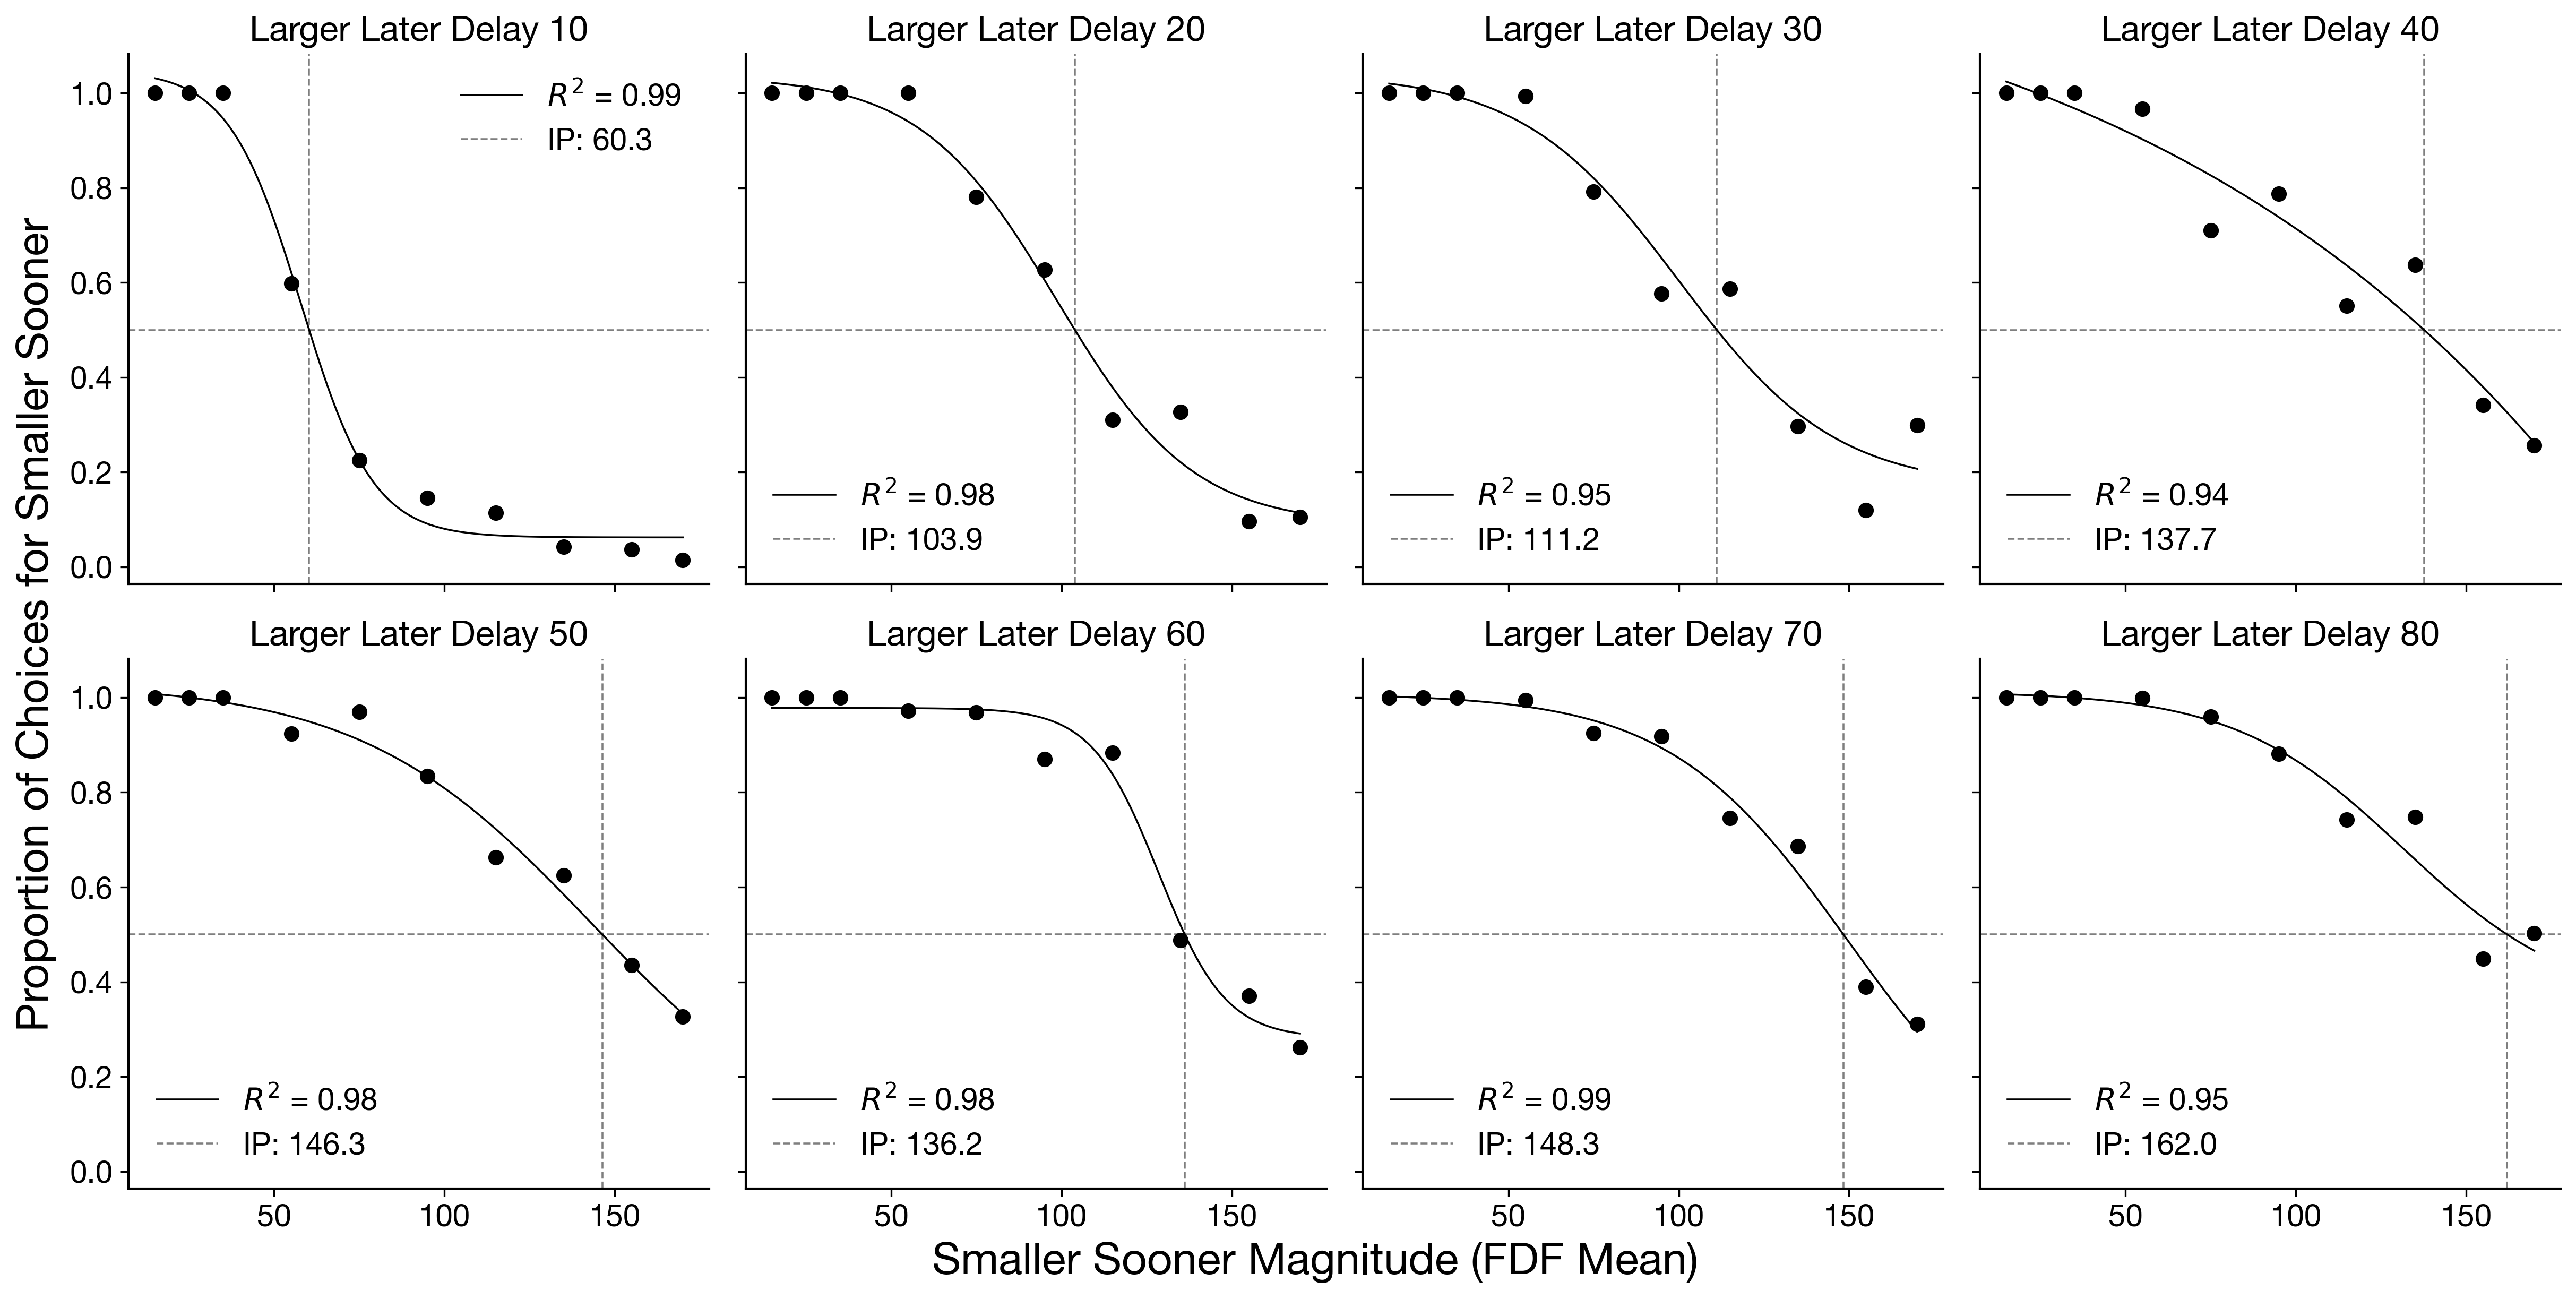

In [4]:
AO = 30

ind_data = pd.read_csv('out/ind_ao_data.csv')
ao_data = ind_data[(ind_data['Rep'] == AO) & (ind_data['LLDelay'] != 5)]

fig, axs = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)
axs = axs.flatten()

for i, delay in enumerate(ao_data['LLDelay'].unique()):
    data = ao_data[ao_data['LLDelay'] == delay]
    ax = axs[i]

    x = data['SSMag'].values
    y = data['PropSS'].values

    popt, _ = curve_fit(sigmoid, x, y, p0=[-0.9, 0.05, 100, 1], maxfev=1000000)
    # calculate R^2
    residuals = y - sigmoid(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)

    plotting_x = np.linspace(min(x), max(x), 10000)
    plotting_y = sigmoid(plotting_x, *popt)

    indiff_pt = plotting_x[np.argmin(np.abs(plotting_y - 0.5))]

    ax.scatter(x, y)
    ax.plot(plotting_x, plotting_y, color='k', label=f'$R^2$ = {r2:.2f}', lw=0.85)
    ax.axhline(0.5, color='k', linestyle='--', lw=0.85, alpha=0.5)
    ax.axvline(indiff_pt, color='k', linestyle='--', label=f'IP: {indiff_pt:.1f}', lw=0.85, alpha=0.5)
    ax.set_title(f'Larger Later Delay {int(delay)}', fontsize=16)
    ax.legend(fontsize=14)

fig.tight_layout()
fig.text(0.5, -0.01, 'Smaller Sooner Magnitude (FDF Mean)', ha='center', size=20)
fig.text(-0.01, 0.5, 'Proportion of Choices for Smaller Sooner', va='center', rotation='vertical', size=20)

plt.show()

# Average Estimation

In [5]:
avg_data = pd.read_csv('out/mean_sd_data.csv')
avg_data = avg_data.iloc[1:].drop(columns=['File']).apply(pd.to_numeric)

avg_data

,Sched,Rep,Rep.1,P1,P1.1,R1,R1.1,B1,B1.1,P2,...,R2,R2.1,B2,B2.1,SSMag,SSMag.1,LLDelay,LLDelay.1,PropSS,PropSS.1
1,1.0,15.5,8.803408,0.0,0.0,4.964167,9.279438,5.816667,10.841490,0.0,...,78.028333,7.223190,328.405833,30.415853,115.0,0.0,5.0,0.0,0.019590,0.039101
2,2.0,15.5,8.803408,0.0,0.0,14.970000,9.807003,17.517500,11.540682,0.0,...,36.141667,3.681403,239.885000,25.450245,115.0,0.0,10.0,0.0,0.070641,0.050321
3,3.0,15.5,8.803408,0.0,0.0,49.225833,12.280310,57.945833,14.391649,0.0,...,11.673333,2.558909,113.275833,24.907400,115.0,0.0,20.0,0.0,0.344684,0.106254
4,4.0,15.5,8.803408,0.0,0.0,65.280000,11.810748,77.057500,14.106308,0.0,...,5.861667,1.524268,67.622500,17.961218,115.0,0.0,30.0,0.0,0.535486,0.109013
5,5.0,15.5,8.803408,0.0,0.0,75.471667,9.863833,88.890833,11.676054,0.0,...,3.561667,0.943803,45.317500,12.643472,115.0,0.0,40.0,0.0,0.663059,0.090851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,5.0,15.5,8.803408,0.0,0.0,95.549167,11.210378,114.684167,13.399758,0.0,...,2.511667,1.022879,32.169167,13.121348,95.0,0.0,40.0,0.0,0.780861,0.089744
87,6.0,15.5,8.803408,0.0,0.0,99.528333,7.496254,119.275833,8.924498,0.0,...,1.830000,0.619072,24.822500,8.878319,95.0,0.0,50.0,0.0,0.827868,0.061117
88,7.0,15.5,8.803408,0.0,0.0,100.811667,8.646326,120.975833,10.563465,0.0,...,1.500833,0.629535,21.384167,9.301449,95.0,0.0,60.0,0.0,0.849386,0.066164
89,8.0,15.5,8.803408,0.0,0.0,104.436667,7.241376,125.193333,8.833571,0.0,...,1.142500,0.406634,16.922500,6.902168,95.0,0.0,70.0,0.0,0.880421,0.049607


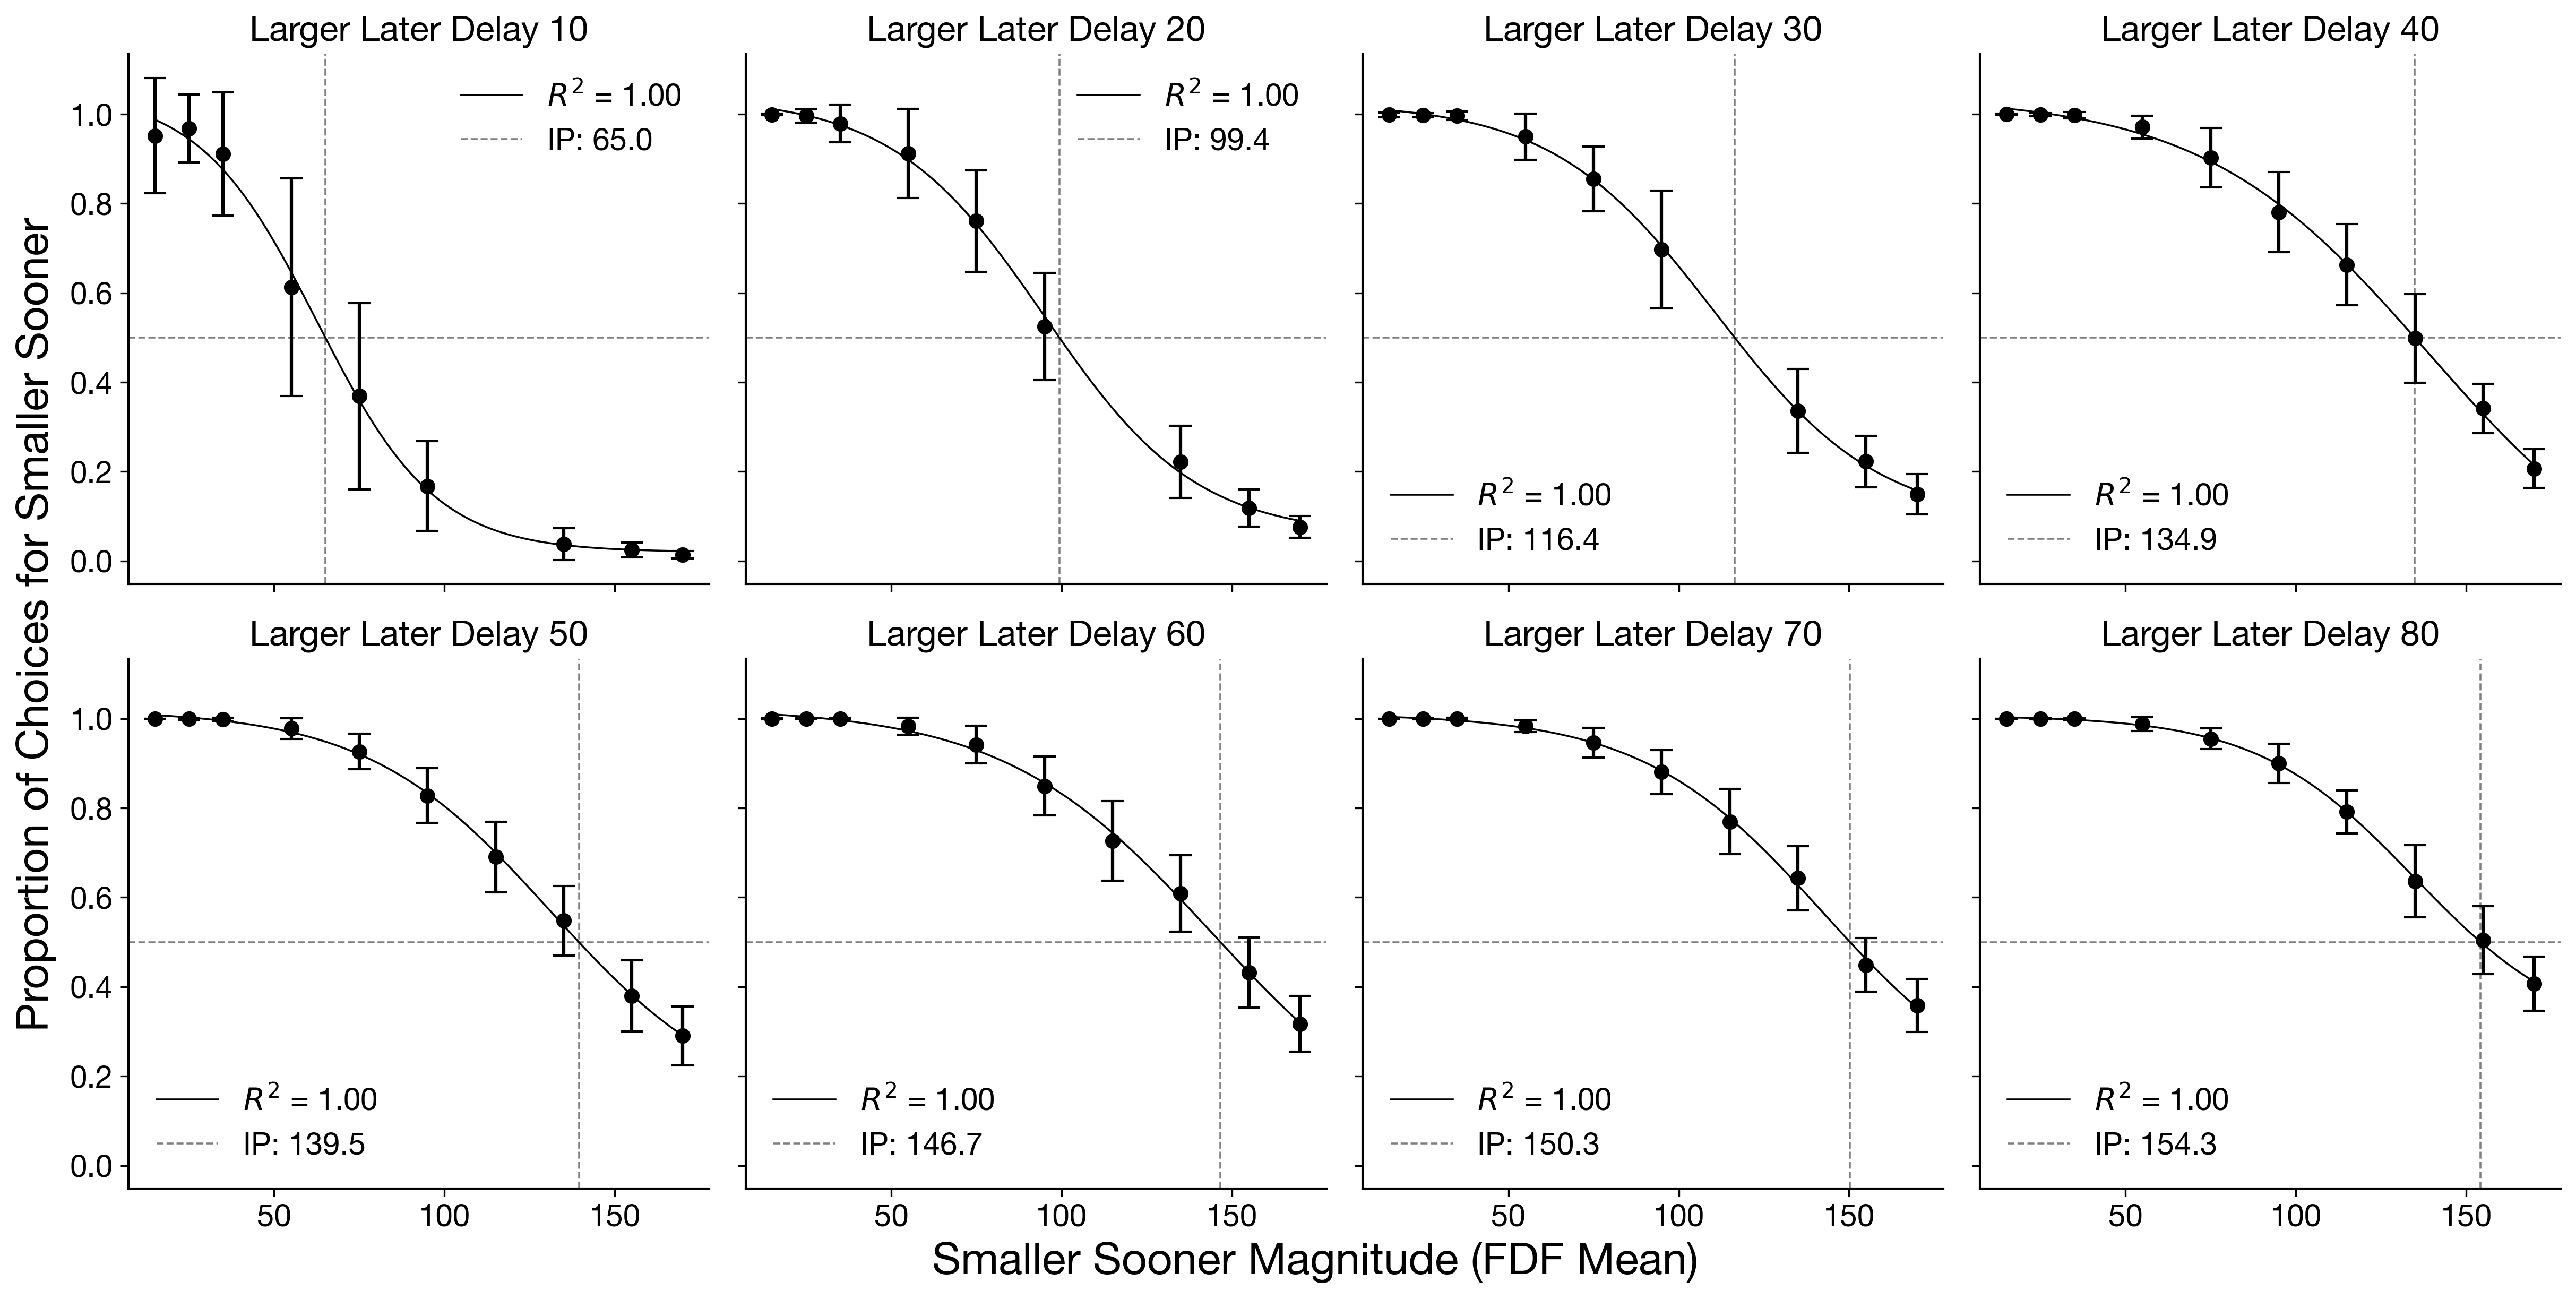

In [8]:

avg_data = avg_data[avg_data['LLDelay'] != 5].iloc[1:]

fig, axs = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)
axs = axs.flatten()

for i, delay in enumerate(ao_data['LLDelay'].unique()):
    data = avg_data[avg_data['LLDelay'] == delay]
    ax = axs[i]

    x = data['SSMag'].to_numpy()
    y = data['PropSS'].to_numpy()

    popt, _ = curve_fit(sigmoid, x, y, p0=[-0.9, 0.05, 100, 1], maxfev=1000000)
    # calculate R^2
    residuals = y - sigmoid(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)

    plotting_x = np.linspace(min(x), max(x), 10000)
    plotting_y = sigmoid(plotting_x, *popt)

    indiff_pt = plotting_x[np.argmin(np.abs(plotting_y - 0.5))]

    ax.scatter(x, y)
    ax.errorbar(x, y, yerr=data['PropSS.1'].values, fmt='none', color='k', capsize=5)
    ax.plot(plotting_x, plotting_y, color='k', label=f'$R^2$ = {r2:.2f}', lw=0.85)
    ax.axhline(0.5, color='k', linestyle='--', lw=0.85, alpha=0.5)
    ax.axvline(indiff_pt, color='k', linestyle='--', label=f'IP: {indiff_pt:.1f}', lw=0.85, alpha=0.5)
    ax.set_title(f'Larger Later Delay {int(delay)}', fontsize=16)
    ax.legend(fontsize=14)

fig.tight_layout()
fig.text(0.5, -0.01, 'Smaller Sooner Magnitude (FDF Mean)', ha='center', size=20)
fig.text(-0.01, 0.5, 'Proportion of Choices for Smaller Sooner', va='center', rotation='vertical', size=20)

plt.show()